In [6]:
import healpy as hp
import numpy as np
import healsparse as hsp
import matplotlib.pyplot as plt
import skyproj
import galstreams
from matplotlib.colors import ListedColormap
import astropy.table as table

In [7]:
mws = galstreams.MWStreams(verbose=False, implement_Off=False, print_topcat_friendly_files=False)




Initializing galstreams library from master_log... 


In [11]:
version_number_string = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/release_version.txt', format='ascii.fast_no_header')['col1'][0]
dwarf_all = table.Table.read('https://github.com/apace7/local_volume_database/releases/download/'+version_number_string+'/dwarf_all.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')


In [12]:
def get_points(name):
    track=mws[name].track
    ra = track.ra.deg
    dec = track.dec.deg
    return ra,dec
gray_names=[]
stream_names=[]
for name in mws.keys():
    if name not in stream_names:
        if "Gaia" not in stream_names:
            gray_names.append(name)

gray_dict={}
gray_names = sorted(set(gray_names))
for name in gray_names:
    try:
        ra,dec=get_points(name)
        gray_dict[name]={}
        gray_dict[name]['ra'], gray_dict[name]['dec']= ra,dec
        
    except:
        print(name)
        continue

In [13]:
stream_dict=gray_dict

In [14]:
len(gray_names)

141

In [15]:
tab10 = plt.get_cmap("tab10").colors
custom_tab = [tab10[i] for i in range(10) if i not in [7]]
custom_cmap = ListedColormap(custom_tab)

In [16]:
def draw_des19(self, edgecolor='red', lw=2, **kwargs):
        """Draw the DES 2019 footprint."""
        filename = get_datafile('des-round19-poly.txt')
        return self.draw_polygon_file(filename, edgecolor=edgecolor, lw=lw, **kwargs)

In [15]:
dwarf_pix = hp.ang2pix(128, dwarf_all['ra'], dwarf_all['dec'], lonlat=True)
dwarf_sel=(~np.isnan(healpix_dict[f"sv_1p0_band_{band}_nside_128"].filled()[dwarf_pix]))

20.0-1-M18
Aquarius-W11
C-19-I21
LMS1-Y20
M2-I21
M30-S20
Molonglo-G17
Pal13-S20
Phlegethon-I21
Sagittarius-A20


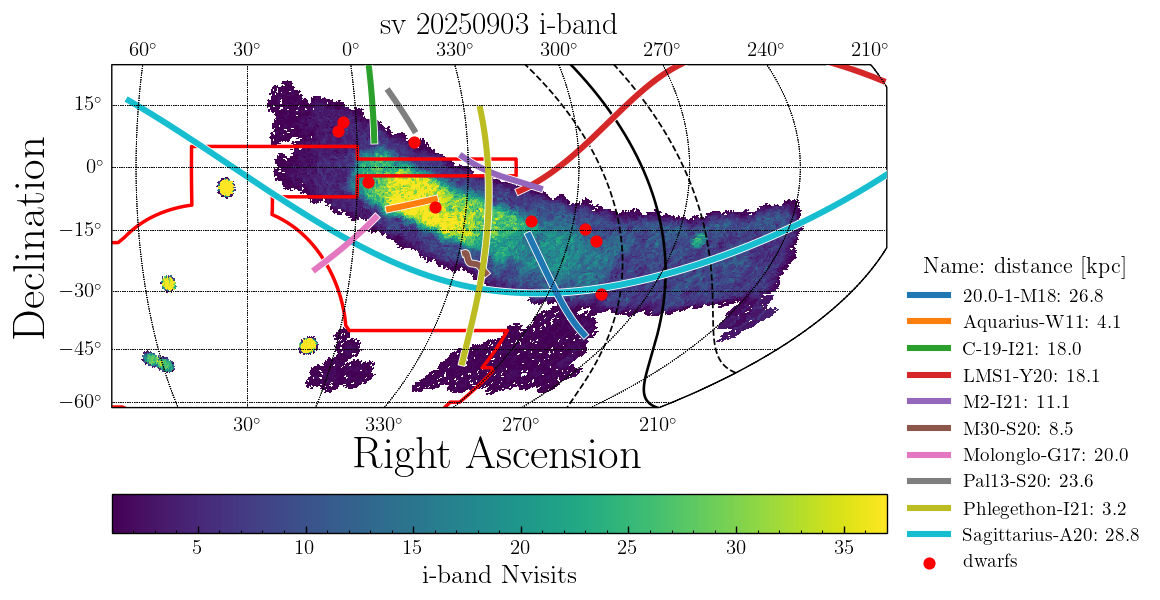

In [18]:
for band in ['i']:
    fig = plt.figure(1, figsize=(8, 6), dpi=125)
    fig.clf()
    ax = fig.add_subplot(111)
    sp = skyproj.DESMcBrydeSkyproj(ax=ax)
    sp.draw_milky_way()
    sp.draw_des()
    # Note that the default is to zoom in to the range defined by the map
    _ = sp.draw_hpxmap(healpix_dict[f"sv_1p0_band_{band}_nside_128"].filled(), zoom=True)#, zoom=False)
    plt.colorbar(label=f"{band}-band Nvisits", orientation="horizontal")
    plt.title(f"sv 20250903 {band}-band", y=1.06)
    for i,name in enumerate(gray_names):
        diff=0
        alpha=1
        lon =  stream_dict[name]["ra"] + diff
        lat =  stream_dict[name]["dec"] + diff
        sel = (lon < 10) & (lon > -35) & ((lat < 30) | (lat > 230))
        sel = (lon > 270) & (lat < 10) & (lat > -35)
        if sel.sum()==0:
            continue
        if mws.summary[mws.summary["TrackName"]==name]["distance_mid"].values[0] < 2:
            continue
        # x, y = proj.ang2xy(lon, lat, lonlat=True)
        if np.isin(name, ["Jhelum-b-B19"]):
            continue
        print(name)
        if name == "AAU-ATLAS-L21":
            st=sp.plot(lon, lat, zorder=9, alpha=alpha, lw=3.5, c="tab:red", label=name[:-4])
        elif name == "Sagittarius-A20":
            st=sp.plot(lon, lat, zorder=7, alpha=alpha, lw=3.5, label=f'{name}: {mws.summary[mws.summary["TrackName"]==name]["distance_mid"].values[0]:0.1f}')
        else: 
            label=f'{name}: {mws.summary[mws.summary["TrackName"]==name]["distance_mid"].values[0]:0.1f}'#[:-4]#.split("-")[0]
            if label=="GD":
                label="GD-1"
            st=sp.plot(lon, lat, zorder=8, alpha=alpha, label=label, lw=3.5)
        st=sp.plot(lon, lat, zorder=6, alpha=alpha, lw=4.5, c="w")
    sp.scatter(dwarf_all['ra'][dwarf_sel], dwarf_all['dec'][dwarf_sel], c="red", label="dwarfs", zorder=9)
    legend=sp.legend(loc=(1.02, -0.5), edgecolor="None", facecolor="None", title="Name: distance [kpc]", fontsize=11, title_fontsize=13)
    legend.get_title().set_ha('center')
    
    plt.savefig(f"sv_1p0_{band}-band_nvisit_streams.png")

In [19]:
for i,name in enumerate(gray_names):
    print(name)

20.0-1-M18
300S-F18
AAU-ATLAS-L21
AAU-AliqaUma-L21
ACS-R21
Acheron-G09
Alpheus-G13
Aquarius-W11
C-10-I24
C-11-I24
C-12-I24
C-13-I24
C-19-I21
C-20-I24
C-22-I24
C-23-I24
C-24-I24
C-25-I24
C-4-I21
C-5-I21
C-7-I21
C-8-I21
C-9-I24
Cetus-New-Y21
Cetus-Palca-T21
Cetus-Y13
Cocytos-G09
Corvus-M18
Elqui-S19
Eridanus-M17
GD-1-I21
Gaia-1-I21
Gaia-10-I21
Gaia-11-I21
Gaia-12-I21
Gaia-2-I21
Gaia-3-M18
Gaia-4-M18
Gaia-5-M18
Gaia-6-I21
Gaia-7-I21
Gaia-8-I21
Gaia-9-I21
Gunnthra-I21
Hermus-G14
Hrid-I21
Hydrus-I24
Hyllus-G14
Indus-S19
Jet-F22
Jhelum-a-B19
Jhelum-b-B19
Kshir-I21
Kwando-I21
LMS1-Y20
Leiptr-I21
Lethe-G09
M2-I21
M3-Y23
M30-S20
M5-G19
M68-P19
M92-I21
Molonglo-G17
Monoceros-R21
Murrumbidgee-G17
NGC1261-I21
NGC1261a-I24
NGC1261b-I24
NGC1851-I21
NGC2298-I21
NGC288-I21
NGC3201-P21
NGC5053-L06
NGC5466-J21
NGC6362-S20
NGC6397-I21
NGC7492-I24
New-1-I24
New-10-I24
New-11-I24
New-12-I24
New-13-I24
New-14-I24
New-15-I24
New-16-I24
New-17-I24
New-18-I24
New-19-I24
New-2-I24
New-20-I24
New-21-I24
New-22-I

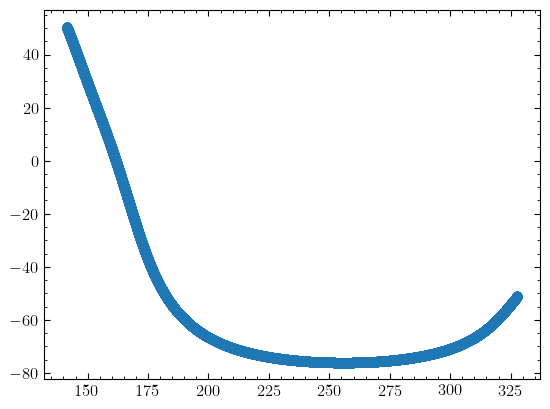

In [23]:
plt.scatter(stream_dict['Orphan-K23']['ra'], stream_dict['Orphan-K23']['dec'])

In [100]:
mws.summary.columns

Index(['Imp', 'On', 'TrackName', 'Name', 'TrackRefs', 'TrackRefsLatex',
       'Notes', 'from-Members', 'width_phi2', 'width_phi2_Ref',
       'width_pm_phi1_cosphi2', 'width_pm_phi1_cosphi2_Ref', 'width_pm_phi2',
       'width_pm_phi2_Ref', 'total_v_sigma', 'total_v_sigma_Ref', 'Lv_stream',
       'L_Ref', 'width_comment', 'length', 'ra_o', 'dec_o', 'distance_o',
       'ra_f', 'dec_f', 'distance_f', 'ra_mid', 'dec_mid', 'distance_mid',
       'ra_pole', 'dec_pole', 'InfoFlags', 'has_empirical_track', 'has_D',
       'has_pm', 'has_vrad', 'DiscoveryRefs', 'ID'],
      dtype='object')

In [85]:
dwarf_all[dwarf_sel]

key,ra,dec,name,host,confirmed_real,confirmed_dwarf,rhalf,rhalf_em,rhalf_ep,position_angle,position_angle_em,position_angle_ep,ellipticity,ellipticity_em,ellipticity_ep,ellipticity_ul,ref_structure,distance_modulus,distance_modulus_em,distance_modulus_ep,ref_distance,apparent_magnitude_v,apparent_magnitude_v_em,apparent_magnitude_v_ep,ref_m_v,vlos_systemic,vlos_systemic_em,vlos_systemic_ep,vlos_sigma,vlos_sigma_em,vlos_sigma_ep,vlos_sigma_ul,ref_vlos,pmra,pmra_em,pmra_ep,pmdec,pmdec_em,pmdec_ep,ref_proper_motion,metallicity_spectroscopic,metallicity_spectroscopic_em,metallicity_spectroscopic_ep,metallicity_spectroscopic_sigma,metallicity_spectroscopic_sigma_em,metallicity_spectroscopic_sigma_ep,metallicity_spectroscopic_sigma_ul,ref_metallicity_spectroscopic,rcore,rcore_em,rcore_ep,rking,rking_em,rking_ep,ref_structure_king,rad_sersic,rad_sersic_em,rad_sersic_ep,n_sersic,n_sersic_em,n_sersic_ep,ref_structure_sersic,age,age_em,age_ep,ref_age,metallicity_isochrone,metallicity_isochrone_em,metallicity_isochrone_ep,ref_metallicity_isochrone,flux_HI,flux_HI_em,flux_HI_ep,flux_HI_ul,ref_flux_HI,metallicity_photometric,metallicity_photometric_em,metallicity_photometric_ep,metallicity_photometric_sigma,metallicity_photometric_sigma_em,metallicity_photometric_sigma_ep,metallicity_photometric_sigma_ul,ref_metallicity_photometric,M_V,M_V_em,M_V_ep,mass_stellar,distance,distance_em,distance_ep,ll,bb,sg_xx,sg_yy,sg_zz,distance_gc,distance_m31,distance_lg,distance_host,mass_HI,mass_HI_ul,metallicity,metallicity_em,metallicity_ep,metallicity_type,velocity_gsr,velocity_lg,mass_dynamical_wolf,mass_dynamical_wolf_em,mass_dynamical_wolf_ep,mass_dynamical_wolf_ul,rhalf_physical,rhalf_physical_em,rhalf_physical_ep,rhalf_sph_physical,rhalf_sph_physical_em,rhalf_sph_physical_ep,surface_brightness_rhalf
str23,float64,float64,str22,str13,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str34,float64,float64,float64,str34,float64,float64,float64,str34,float64,float64,float64,float64,float64,float64,float64,str34,float64,float64,float64,float64,float64,float64,str33,float64,float64,float64,float64,float64,float64,float64,str31,float64,float64,float64,float64,float64,float64,str30,float64,float64,float64,float64,float64,float64,str34,float64,float64,float64,str28,float64,float64,float64,str31,float64,float64,float64,float64,str34,float64,float64,float64,float64,float64,float64,int64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
aquarius_2,338.4813,-9.3274,Aquarius II,mw,1,1,5.1,0.8,0.8,121.0,9.0,9.0,0.39,0.09,0.09,--,Torrealba2016MNRAS.463..712T,20.16,0.07,0.07,Torrealba2016MNRAS.463..712T,15.8,0.14,0.14,Torrealba2016MNRAS.463..712T,-65.3,1.8,1.8,4.7,1.2,1.8,--,Bruce2023ApJ...950..167B,-0.179,0.113,0.119,-0.466,0.095,0.096,Pace2022ApJ...940..136P,-2.57,0.17,0.17,0.36,0.14,0.2,--,Bruce2023ApJ...950..167B,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.66,Putman2021ApJ...913...53P,--,--,--,--,--,--,--,--,-4.359999999999999,0.14,0.14,3.9770299956639814,107.64652136298349,3.4147784236531322,3.5266513651757094,55.10824380657447,-53.00849968978198,8.721198822529816,-92.52250217725995,54.32587637128429,105.12796229266009,726.0327977126829,344.52889543784994,105.12796229266009,--,3.255719221656933,-2.57,0.17,0.17,spectroscopic,54.13741330173909,101.99099153476591,2474840.2828676216,1338346.2774492693,2022169.6867195088,--,158.77166847972114,25.137855955935834,25.657238028861883,123.69104595134039,21.665235825894527,21.8480168909623,29.672303516374832
aquarius_3,357.218,-3.489,Aquarius III,mw,1,1,2.1,0.5,0.7,119.0,11.0,17.0,0.47,0.28,0.14,--,Cerny2025ApJ...979..164C,19.66,0.11,0.11,Cerny2025ApJ...979..164C,17.16,0.5,0.3,Cerny2025ApJ...979..164C,-13.1,0.9,1.0,

In [ ]:
["name", "distance", "ra","dec"]